# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:
* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States

# Work Flow
### 1. Load the dataset
### 2. EDA
### 3. Feature selection
### 4. Transform the data
### 5. Build the model
### 6. Model selection
### 7. Conclusion

# 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('crime_data.csv')

# 2. EDA

In [4]:
df.shape

(50, 5)

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Let's rename the Unnamed column
df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [7]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
# Check null values
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
# Chscking duplicates entries
df.duplicated().sum()

0

In [12]:
len(df['State'].unique())

50

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [14]:
### Top 5 State according to Murder
sorted_mureder_df = df.sort_values('Murder',ascending=False).iloc[:5,:]

In [15]:
sorted_mureder_df

,State,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5


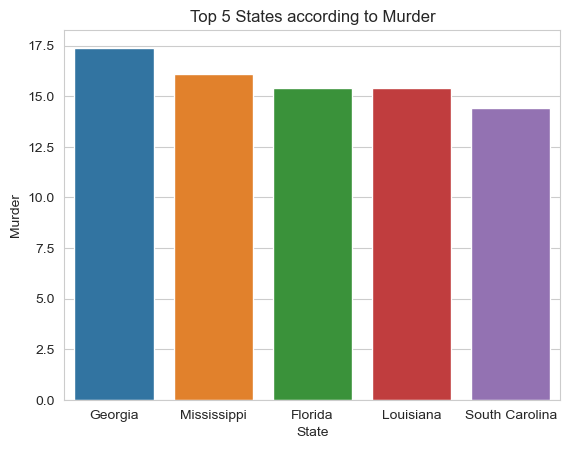

In [16]:
sns.barplot(x='State', y='Murder', data=sorted_mureder_df)
plt.title('Top 5 States according to Murder')
plt.show()

* Georgia is the first state where the maximum Murder cases are recorded .
* Georgia, Mississippi, Florida, Louisiana, South Carolina these are the states which comes in top 5most murder cases recorded states.

In [17]:
### Top 5 State according to Assault cases
df_assault = df.sort_values('Assault',ascending=False).iloc[:5,:]
df_assault

,State,Murder,Assault,UrbanPop,Rape
32,North Carolina,13.0,337,45,16.1
8,Florida,15.4,335,80,31.9
19,Maryland,11.3,300,67,27.8
2,Arizona,8.1,294,80,31.0
30,New Mexico,11.4,285,70,32.1


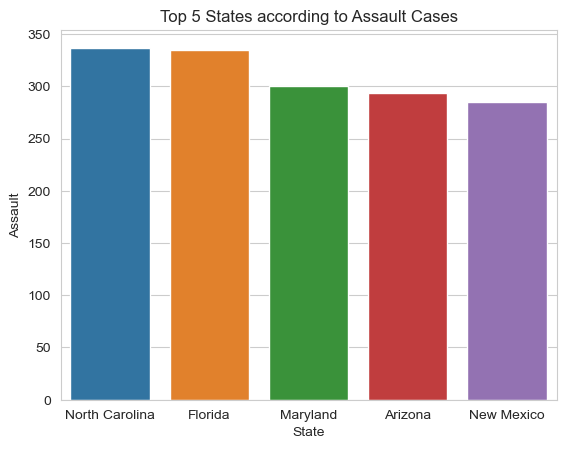

In [18]:
sns.barplot(x='State',y='Assault',data=df_assault)
plt.title('Top 5 States according to Assault Cases')
plt.show()

* There are 3 states where Assault cases are recorded more than 300 and these are North Carolina, Florida, Maryland.
* There are 2 states where Assault cases are recorded between 250 to 300.

In [19]:
### Top 5 States according Rape
df_rape = df.sort_values('Rape',ascending=False).iloc[:5,:]
df_rape

,State,Murder,Assault,UrbanPop,Rape
27,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
21,Michigan,12.1,255,74,35.1


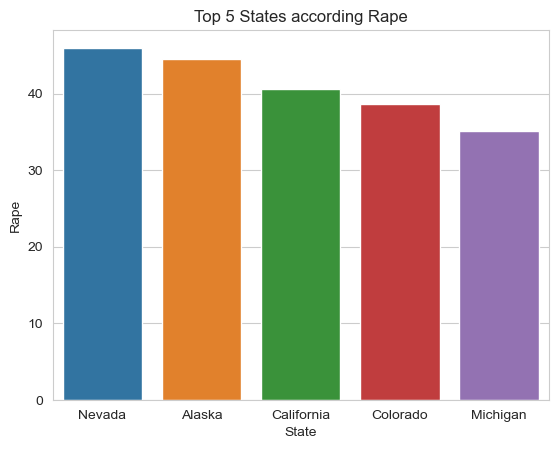

In [20]:
sns.barplot(x='State',y='Rape', data=df_rape)
plt.title('Top 5 States according Rape')
plt.show()

* Nevada is the states where maximum number of rape cases are happened.
* Alaska is the second most rape cases recorded state.
* Where as California have more than 40 rape cases recorded.
* and Colorado, Michigan have rape cases between 35 to 40.

In [21]:
### Top 5 most populated states
df_pop = df.sort_values('UrbanPop', ascending=False).iloc[:5,:]
df_pop

,State,Murder,Assault,UrbanPop,Rape
4,California,9.0,276,91,40.6
29,New Jersey,7.4,159,89,18.8
38,Rhode Island,3.4,174,87,8.3
31,New York,11.1,254,86,26.1
20,Massachusetts,4.4,149,85,16.3


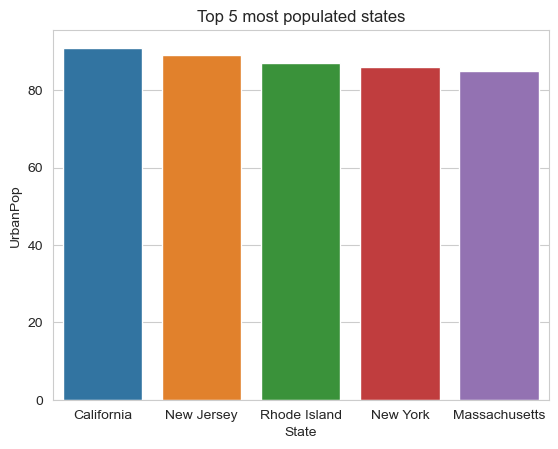

In [22]:
sns.barplot(x='State', y='UrbanPop', data=df_pop)
plt.title('Top 5 most populated states')
plt.show()

* California is the most populated state where as New Jersey is the second most populated state

# 3. Featur selection

In [23]:
df.set_index('State',inplace=True)

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# 4. Transforming the data

## 4.1 Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std = StandardScaler()

In [27]:
std_df = std.fit_transform(df)

In [28]:
std_df[:3]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626]])

## 4.2 MinMax Scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minmax = MinMaxScaler()

In [31]:
minmax_df = minmax.fit_transform(df)
minmax_df[:3]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ]])

## 4.3 Normalizer

In [32]:
from sklearn.preprocessing import Normalizer

In [33]:
norm = Normalizer()

In [34]:
norm_df = norm.fit_transform(df)
norm_df[:3]

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482]])

# 5. Build the model

## 5.1.1 Let's build Hierarchycal clustering model

In [35]:
from scipy.cluster import hierarchy

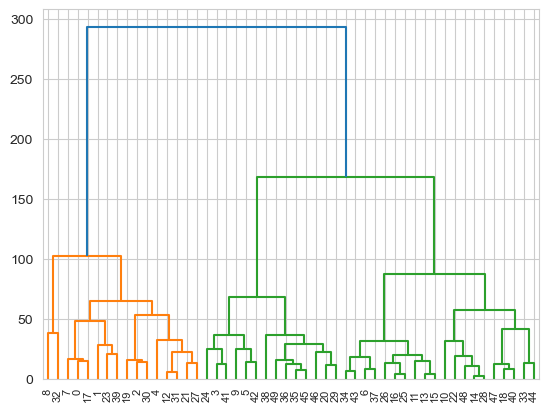

In [36]:
model3 = hierarchy.linkage(df,method='complete')
dn = hierarchy.dendrogram(model3)

## 5.2.1 Build the KMeans model with Standard scaler

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(std_df)
    WCSS.append(model.inertia_)
WCSS

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.57105884207457,
 45.231562496978725,
 40.873497878092174,
 37.0471721978195,
 30.937312877149775,
 28.222080314337372,
 25.26392509947414,
 22.629881406605108,
 21.259853576113567,
 19.180439846978395,
 19.052679060530153,
 16.4511239031106,
 15.577121208702088,
 14.59940693993972,
 14.264408145720239]

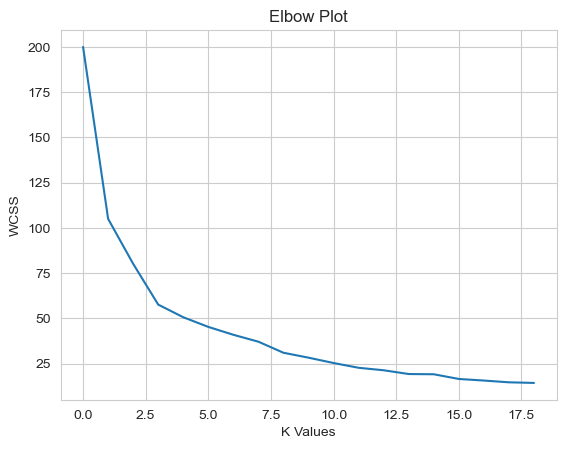

In [39]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

* We can see for k=3 there is drastically change in WCSS so k = 3 is optimal vaue.

In [40]:
df1 = df.copy()

In [41]:
model1 = KMeans(n_clusters=3)
model1.fit(std_df)
model1.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [42]:
labels = model1.labels_
silhouette_score_model1 = silhouette_score(df,labels)
silhouette_score_model1

0.3420305383866158

In [43]:
df1['Labels'] = model1.labels_
df1.head()

,Murder,Assault,UrbanPop,Rape,Labels
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [44]:
grp = df1.groupby('Labels')

In [45]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Labels,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


## 5.2.2 Build KMeans with MinMax Scaler

In [46]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(minmax_df)
    WCSS.append(model.inertia_)
WCSS

[13.184122550256443,
 6.596893867946196,
 5.016388924690672,
 3.6834561535859134,
 3.2243121375400796,
 2.9107804107072686,
 2.568036072979493,
 2.2699587099964367,
 2.1737458671974568,
 1.9080316012887,
 1.7182785346796932,
 1.5760454575113576,
 1.4616622194915347,
 1.3269279023278022,
 1.2093656758144904,
 1.1706528490507104,
 1.0230159227072617,
 0.9550282046729879,
 0.9134880478952592]

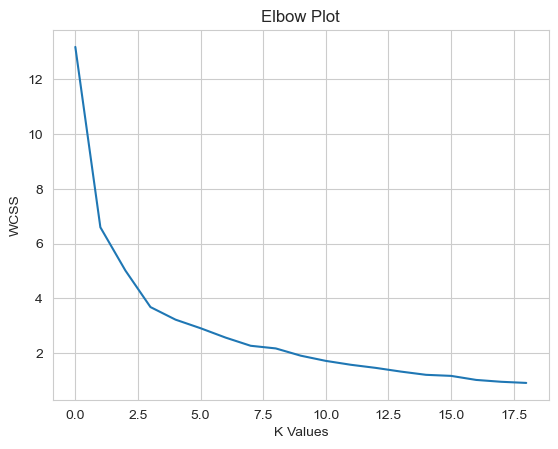

In [47]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

We Take k = 3

In [48]:
model2 = KMeans(n_clusters=3)
model2.fit(minmax_df)

KMeans(n_clusters=3)

In [49]:
labels = model.labels_

In [50]:
silhouette_score_model2 = silhouette_score(df,labels)
silhouette_score_model2

-0.14868758333036428

## 5.2.3 Build KMeans with Normalizer Scaler

In [51]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(norm_df)
    WCSS.append(model.inertia_)
WCSS

[1.9452076233849003,
 0.7540963759591797,
 0.3278478050693132,
 0.23020871208778804,
 0.16395152491640727,
 0.12189729452276521,
 0.09861877942595956,
 0.08873864537725196,
 0.07705592495627916,
 0.06699271284614708,
 0.055618179589892,
 0.04925422579628694,
 0.04681184829203343,
 0.03480831663812668,
 0.0305813826884945,
 0.029370378330105265,
 0.02530445664979181,
 0.02247712410711316,
 0.020238186845613435]

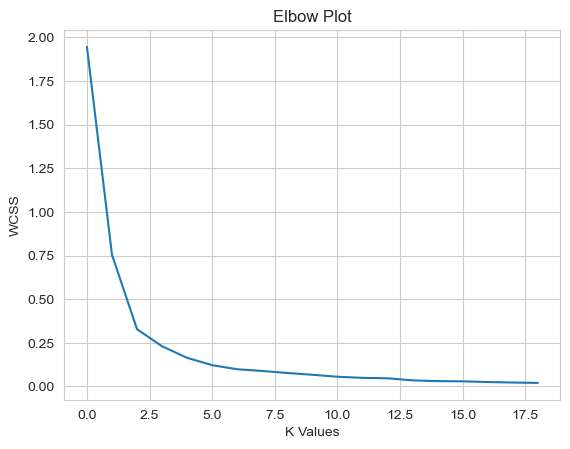

In [52]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

Here we take k = 2

In [53]:
model3 = KMeans(n_clusters=2)
model3.fit(minmax_df)

KMeans(n_clusters=2)

In [54]:
labels = model3.labels_
silhouette_score_model3 = silhouette_score(df,labels)
silhouette_score_model3

0.5406742439027667

## 5.3.1 Build the KMeans++ model with Standard Scaler

In [55]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit(std_df)
    WCSS.append(model.inertia_)
WCSS

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 51.02743813732548,
 44.0673451912911,
 39.18663219899024,
 35.84914257315926,
 31.65730382922448,
 28.40340122969548,
 24.981676843345667,
 22.92867211482942,
 21.17560084026488,
 19.256388196416275,
 18.488618858250923,
 17.20210449746465,
 16.485300950951473,
 14.849219735304018,
 14.29078982067827]

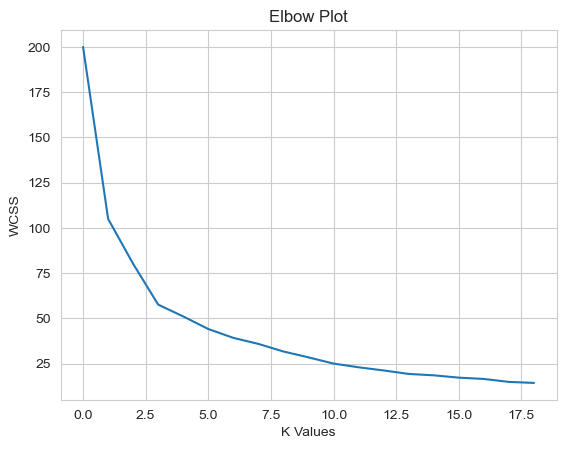

In [56]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

Here we take n_clusters = 3

In [57]:
model4 = KMeans(n_clusters=3, init='k-means++')

In [58]:
model4.fit(std_df)

KMeans(n_clusters=3)

In [59]:
labels = model4.labels_
labels

array([2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1])

In [60]:
silhouette_score_model4 = silhouette_score(df,labels)
silhouette_score_model4

0.3420305383866158

In [61]:
df2 = df.copy()

In [62]:
df2['Labels'] = model2.labels_

In [63]:
grp = df2.groupby('Labels')

In [64]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Labels,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.016667,143.888889,72.333333,19.344444
2,3.600000,78.538462,52.076923,12.176923


## 5.3.2 Build KMeans++ with MinMax Scaler

In [65]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit(minmax_df)
    WCSS.append(model.inertia_)
WCSS

[13.184122550256443,
 6.596893867946196,
 5.010878493006417,
 3.7075581307105736,
 3.26183637204696,
 2.815794866355519,
 2.567037583702055,
 2.4198721091213136,
 2.127642031485487,
 1.9213973119334906,
 1.6288809959148018,
 1.597324893081547,
 1.422213188617867,
 1.3200547816338186,
 1.2522727862252894,
 1.1867137468024591,
 1.0279486975994496,
 0.9843478650731261,
 0.9258372164523478]

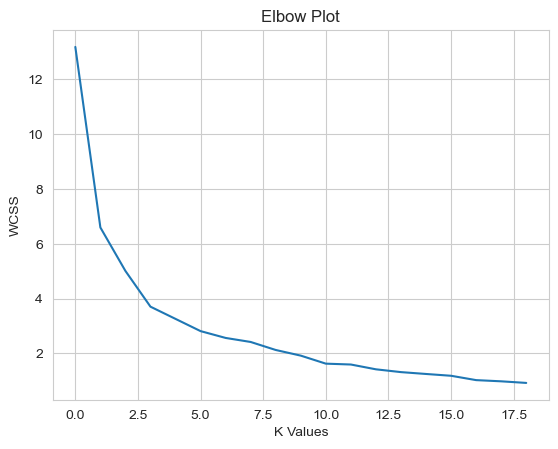

In [66]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [67]:
model5 = KMeans(n_clusters=3, init='k-means++')
model5.fit(minmax_df)

KMeans(n_clusters=3)

In [68]:
labels = model5.labels_
labels

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [69]:
silhouette_score_model5 = silhouette_score(df,labels)
silhouette_score_model5

0.38062704226088995

## 5.3.3 Build KMeans++ with Normalizer

In [70]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit(norm_df)
    WCSS.append(model.inertia_)
WCSS

[1.9452076233849003,
 0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16395152491640727,
 0.12059896172575112,
 0.09861877942595956,
 0.08800664163209596,
 0.07707443535579625,
 0.06573495316778673,
 0.05630157937290547,
 0.04822647288442139,
 0.04270801088440087,
 0.03802375729030402,
 0.03272018777403025,
 0.027078469092281777,
 0.024336235869330206,
 0.02233450117910844,
 0.020233575218702247]

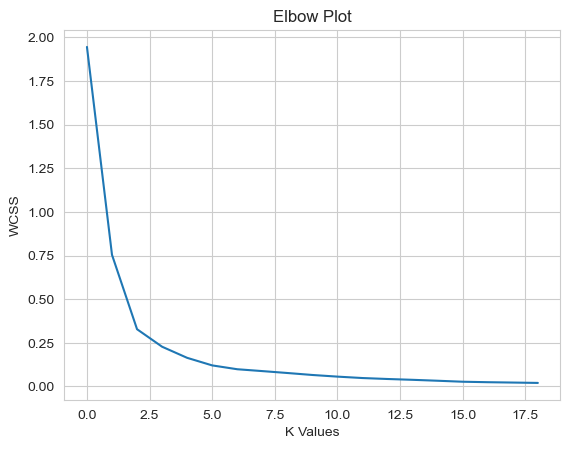

In [71]:
plt.plot(WCSS)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

Here we take n_clusters = 2

In [72]:
model6 = KMeans(n_clusters=2, init='k-means++')
model6.fit(norm_df)

KMeans(n_clusters=2)

In [73]:
labels = model6.labels_
labels

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0])

In [74]:
silhouette_score_model6 = silhouette_score(df,labels)
silhouette_score_model6

0.3380548601988659

## 5.4.1 Let's Build DBSCAN model with Standard Scaler

In [75]:
from sklearn.cluster import DBSCAN

In [76]:
# Let's find optimum value of min_samples
min_samples = [2, 3, 4, 5, 6, 7, 8, 9]
eps = 0.5
for i in min_samples:
    model = DBSCAN(eps=eps, min_samples=i)
    model.fit(std_df)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Calculate the number of clusters
    if n_clusters > 1:
        print('For min_samples: ' + str(i))
        print('labels: '+str(model.labels_))
        print('silhouette_score: ' + str(silhouette_score(df, labels)))
        print('_' * 100)
    else:
        print(f"Only 1 cluster found for min_samples={i}")

For min_samples: 2
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1  2 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  3 -1]
silhouette_score: -0.4072830937907539
____________________________________________________________________________________________________
Only 1 cluster found for min_samples=3
Only 1 cluster found for min_samples=4
Only 1 cluster found for min_samples=5
Only 1 cluster found for min_samples=6
Only 1 cluster found for min_samples=7
Only 1 cluster found for min_samples=8
Only 1 cluster found for min_samples=9


In [77]:
# Let's find optimum value of epsilon
eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in eps:
    model = DBSCAN(eps=i, min_samples=2)
    model.fit(std_df)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        print('For eps: '+ str(i))
        print('labels: ' + str(labels))
        print('silhouette_score: '+ str(silhouette_score(df,labels)))

For eps: 0.4
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
silhouette_score: -0.2985971890824809
For eps: 0.5
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1  2 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  3 -1]
silhouette_score: -0.4072830937907539
For eps: 0.6
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  1 -1 -1  2  3 -1  3  4 -1
 -1 -1  1 -1  2 -1  3  0 -1 -1 -1  1  5  1 -1 -1 -1 -1 -1 -1 -1  1  5 -1
  4 -1]
silhouette_score: -0.37394601988458187
For eps: 0.7
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1 -1 -1  1  2 -1  2  1 -1
 -1 -1  1 -1  1 -1  2  0 -1 -1  1  1  3  1 -1 -1 -1 -1 -1 -1 -1  1  3 -1
  1 -1]
silhouette_score: -0.2918418761976329
For eps: 0.8
labels: [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  2  1  1  1 -1  0  1  3 -1  3  1  4
 -1  1  1 -1  1 -1  3  2 -1  1  1  1  5  1 -1  4  1 -

* For eps = 0.9 we get maximum silhouette_score so the clusters are well seperated for eps = 0.9

In [78]:
model7 = DBSCAN(eps=0.9, min_samples=2)
model7.fit(std_df)
labels = model6.labels_
silhouette_score_model7 = silhouette_score(df,labels)
silhouette_score_model7

0.3380548601988659

## 5.4.2 Build DBSCAN Model with MinMax Scaler

In [79]:
# Let's find optimum value of min_samples
min_samples = [2, 3, 4, 5, 6, 7, 8, 9]
eps = 0.5
for i in min_samples:
    model = DBSCAN(eps=eps, min_samples=i)
    model.fit(minmax_df)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Calculate the number of clusters
    if n_clusters > 1:
        print('For min_samples: ' + str(i))
        print('labels: '+str(model.labels_))
        print('silhouette_score: ' + str(silhouette_score(df, labels)))
        print('_' * 100)
    else:
        print(f"Only 1 cluster found for min_samples={i}")

Only 1 cluster found for min_samples=2
Only 1 cluster found for min_samples=3
Only 1 cluster found for min_samples=4
Only 1 cluster found for min_samples=5
Only 1 cluster found for min_samples=6
Only 1 cluster found for min_samples=7
Only 1 cluster found for min_samples=8
Only 1 cluster found for min_samples=9


In [80]:
# Let's find optimum value of epsilon
eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in eps:
    model = DBSCAN(eps=i, min_samples=2)
    model.fit(minmax_df)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        print('For eps: '+ str(i))
        print('labels: ' + str(labels))
        print('silhouette_score: '+ str(silhouette_score(df,labels)))

For eps: 0.1
labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
silhouette_score: -0.2985971890824809
For eps: 0.2
labels: [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  2  1  1  1 -1  0  1  3 -1  3  1  4
 -1  1  1 -1  1 -1  3  2 -1  1  1  1  5  1 -1  4  1 -1 -1  5 -1  1  5  1
  1  1]
silhouette_score: -0.13357773407278523
For eps: 0.3
labels: [ 0 -1  1  1 -1 -1  1 -1 -1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0
  1  1  1 -1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]
silhouette_score: 0.175315573916221


* We take eps = 0.3 and n_clusters = 2

In [81]:
model8 = DBSCAN(eps = 0.3, min_samples=2)
model8.fit(minmax_df)
labels = model8.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
    print('labels: ' + str(labels))
    silhouette_score_model8 = silhouette_score(df,labels)
    print('silhouette_score: '+ str(silhouette_score_model8))

labels: [ 0 -1  1  1 -1 -1  1 -1 -1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0
  1  1  1 -1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]
silhouette_score: 0.175315573916221


## 5.4.3 Build DBSCAN With Normalizer

In [82]:
# Let's find optimum value of min_samples
min_samples = [2, 3, 4, 5, 6, 7, 8, 9]
eps = 0.1
for i in min_samples:
    model = DBSCAN(eps=eps, min_samples=i)
    model.fit(norm_df)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Calculate the number of clusters
    if n_clusters > 1:
        print('For min_samples: ' + str(i))
        print('labels: '+str(model.labels_))
        print('silhouette_score: ' + str(silhouette_score(df, labels)))
        print('_' * 100)
    else:
        print(f"Only 1 cluster found for min_samples={i}")

For min_samples: 2
labels: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0]
silhouette_score: 0.18431534827054294
____________________________________________________________________________________________________
For min_samples: 3
labels: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0]
silhouette_score: 0.18431534827054294
____________________________________________________________________________________________________
For min_samples: 4
labels: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0]
silhouette_score: 0.18431534827054294
____________________________________________________________________________________________________
For min_samples: 5
labels: [ 0  0  0  0 

* I tried different values of eps but only get noise points so, for eps=0.1 I got labels and for min_samples = 2.

In [83]:
model9 = DBSCAN(eps=0.1,min_samples=2)
model9.fit(norm_df)
labels = model9.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
      dtype=int64)

In [84]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
    print('labels: ' + str(labels))
    silhouette_score_model9 = silhouette_score(df,labels)
    print('silhouette_score: '+ str(silhouette_score_model9))

labels: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0]
silhouette_score: 0.18431534827054294


In [85]:
metric_df = pd.DataFrame({'model':['KMeans','KMeans','KMeans','KMeans++','KMeans++','KMeans++',
                                  'DBSCAN','DBSCAN','DBSCAN'],
                         'Silhouette_score':[silhouette_score_model1,silhouette_score_model2,silhouette_score_model3,silhouette_score_model4,
                                            silhouette_score_model5,silhouette_score_model6,silhouette_score_model7,
                                            silhouette_score_model8,silhouette_score_model9],
                         'Transformation':['StandardScaler','MinMaxScaler','Normalizer',
                                           'StandardScaler','MinMaxScaler','Normalizer',
                                           'StandardScaler','MinMaxScaler','Normalizer']})

In [86]:
metric_df 

,model,Silhouette_score,Transformation
0,KMeans,0.342031,StandardScaler
1,KMeans,-0.148688,MinMaxScaler
2,KMeans,0.540674,Normalizer
3,KMeans++,0.342031,StandardScaler
4,KMeans++,0.380627,MinMaxScaler
5,KMeans++,0.338055,Normalizer
6,DBSCAN,0.338055,StandardScaler
7,DBSCAN,0.175316,MinMaxScaler
8,DBSCAN,0.184315,Normalizer


In [87]:
metric_df.sort_values('Silhouette_score',ascending=False)

,model,Silhouette_score,Transformation
2,KMeans,0.540674,Normalizer
4,KMeans++,0.380627,MinMaxScaler
0,KMeans,0.342031,StandardScaler
3,KMeans++,0.342031,StandardScaler
5,KMeans++,0.338055,Normalizer
6,DBSCAN,0.338055,StandardScaler
8,DBSCAN,0.184315,Normalizer
7,DBSCAN,0.175316,MinMaxScaler
1,KMeans,-0.148688,MinMaxScaler


## 6. Model Selection

In [88]:
final_model = KMeans(n_clusters=3)
final_model.fit(minmax_df)
final_model.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [89]:
df['Labels'] = final_model.labels_

In [90]:
df.describe()

,Murder,Assault,UrbanPop,Rape,Labels
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,0.900000
std,4.35551,83.337661,14.474763,9.366385,0.788954
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000
50%,7.25000,159.000000,66.000000,20.100000,1.000000
75%,11.25000,249.000000,77.750000,26.175000,1.750000
max,17.40000,337.000000,91.000000,46.000000,2.000000


In [91]:
grp = df.groupby('Labels')
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Labels,,,,
0,6.016667,143.888889,72.333333,19.344444
1,12.331579,259.315789,68.315789,29.215789
2,3.600000,78.538462,52.076923,12.176923


## 7. Conclusion

* We tried different models like KMeans, KMeans++ and DBSCAN but KMeans gives the best silhouette_score.
* When we apply MinMax Scaler and KMeans algorithm then I got maximum silhourtte_score that means the better the cluster.